# Examen de Deep Learning
<br>

## Importation des libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import smart_resize
from tensorflow.keras import layers
from numpy import asarray
import numpy as np
from tensorflow import random
import os
import glob
import cv2
import pickle

<br/>

## Importation des images

In [2]:
# Changer le répertoire de travail
os.chdir('C:\\Users\\louis\\Documents\\Cours MSDA\\Deep Learning\\EXAMEN DEEP LEARNING')

In [3]:
# Répertoires
wd = os.getcwd()
train_path = wd+'/challenge_data'
test_path = wd+'/challenge_test_data'

In [4]:
train_count = len(list(glob.glob(train_path+'/*/*.jpg')))
print("Train images : "+str(train_count))

test_count = len(list(glob.glob(test_path+'/*/*.jpg')))
print("Test images : "+str(test_count))

Train images : 5102
Test images : 1045


In [5]:
test_paths = list(glob.glob(test_path+'/*'))
train_paths = list(glob.glob(train_path+'/*'))

In [6]:
cat = []
for i in range(len(test_paths)):
    cat.append(test_paths[i].replace(test_path+"\\",''))

<br/>

### Nom des différentes classes

In [7]:
cat

['Adhered', 'Ballasted', 'Concrete', 'Plastic _ fabric', 'Shingle', 'Steel']

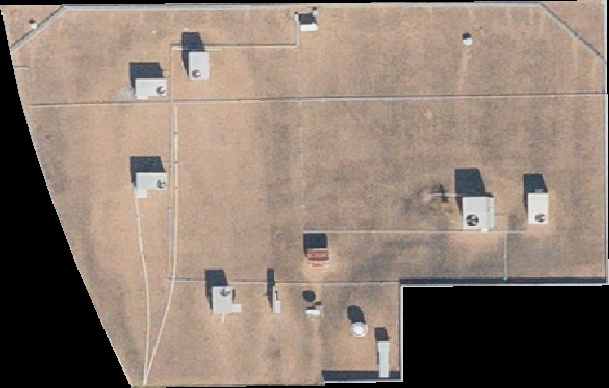

In [8]:
images = list(glob.glob(wd+'/challenge_test_data/*/*.jpg'))
IM = PIL.Image.open(str(images[0]))
IM

<br/>

## Création des datasets

In [9]:
batch_size = 16
img_height = img_width = 100

In [10]:
training_data = []
test_data = []

In [11]:
for category in train_paths:
    class_num = train_paths.index(category)
    for img in os.listdir(category):
        try:
            img_array = cv2.imread(os.path.join(category,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_height,img_width))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

In [12]:
for category in test_paths:
    class_num = test_paths.index(category)
    for img in os.listdir(category):
        try:
            img_array = cv2.imread(os.path.join(category,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_height,img_width))
            test_data.append([new_array, class_num])
        except Exception as e:
            pass

### Données d'apprentissage

In [13]:
X = [features for features, label in training_data]
Y = [label for features, label in training_data]

In [14]:
print(len(Y))
print(len(X))

5102
5102


In [15]:
X = np.array(X).reshape(-1, img_height, img_width, 1)

In [16]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

### Données de test

In [17]:
X_test = [features for features, label in test_data]
Y_test = [label for features, label in test_data]

In [18]:
X_test = np.array(X_test).reshape(-1, img_height, img_width, 1)

In [19]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

### Visualisation de quelques images

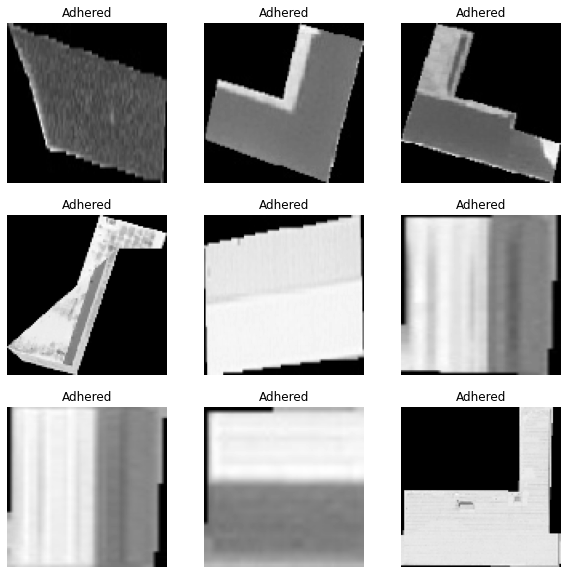

In [20]:
plt.figure(figsize=(10, 10))
i = 0
for images in training_data:
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[0], cmap="gray")
    plt.title(cat[int(Y[i])])
    plt.axis("off")
    i += 1
    if i == 9:
        break

<br/>

## Initialisation du CNN

In [21]:
x = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("Y.pickle","rb"))

X = x/255.0

In [23]:
# Model
model = Sequential()

# Convolution
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


#  Flattening
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

history = model.fit(X, np.array(y), batch_size=32, validation_split=0.2, epochs=10)

Epoch 1/10
128/128 [==============================] - 73s 563ms/step - loss: -639484.2859 - accuracy: 0.1320 - val_loss: -84282448.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
128/128 [==============================] - 68s 533ms/step - loss: -78166269.1473 - accuracy: 0.1178 - val_loss: -2162792960.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
128/128 [==============================] - 65s 505ms/step - loss: -987060904.6822 - accuracy: 0.1092 - val_loss: -12818820096.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
128/128 [==============================] - 65s 509ms/step - loss: -4535525302.5736 - accuracy: 0.1318 - val_loss: -44172410880.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
128/128 [==============================] - 65s 511ms/step - loss: -14291942316.6512 - accuracy: 0.1180 - val_loss: -110932033536.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
128/128 [==============================] - 67s 526ms/step - loss: -33721359479.0698 - accuracy: 0.1163 - val_loss: -230541606912.0000 - val_accuracy

In [28]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
val_loss_curve = history.history["val_loss"]
val_acc_curve = history.history["val_accuracy"]

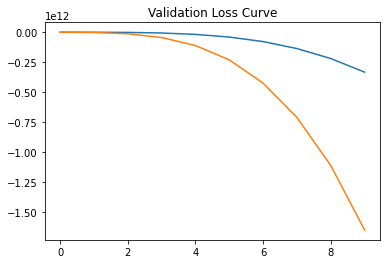

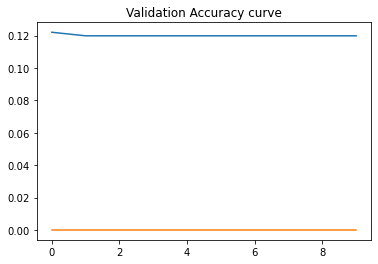

In [33]:
plt.plot(loss_curve)
plt.title("Loss Curve")
plt.plot(val_loss_curve)
plt.title("Validation Loss Curve")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy Curve")
plt.plot(val_acc_curve)
plt.title("Validation Accuracy curve")
plt.show()




<br/>

## Initialisation du MLP

In [ ]:
# Création du MLP
model2 = Sequential()
model2.add(Flatten(input_shape=[200,200]))

In [ ]:
# Création des couches
model2.add(Dense(200, activation="relu"))
model2.add(Dense(100, activation="tanh"))
model2.add(Dense(6, activation="softmax"))

In [ ]:
model2.summary()

In [ ]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [ ]:
history2 = model.fit(X, np.array(Y), batch_size=batch_size, epochs=15, validation_split=0.4)